# Introduction to Input Modelling for Simulation

In this lab you will learn

* How to use auto_fit() to test the fit of distributions
* How to interpret the Chi-Squared and KS-Test results. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Using `auto_fit`

auto_fit is code written by **Dr Michael Allen**, University of Exeter Medical School. The source code can be found on pythonhealthcare.org https://pythonhealthcare.org/2018/05/03/81-distribution-fitting-to-data/

The program:

* Fits a number of distributions to the data and conducts both a Chi-Squared and KS-Test on the data. The data is ranked by the Chi-Squared statistic.
* Produces histograms, p-p and q-q plots of the data versus theoretical distributions

There is an implementation of this code in this repo in `input_modelling.fitting`.  Use the following code to import.

In [5]:
from input_modelling.fitting import auto_fit

Let's test `auto_fit` on some synthetic data.  We will use exponentially distributed data.  We will need to confirm this to `pd.DataFrame` as that the datatype the function `auto_fit` accepts as a parameter.

In [26]:
rng = np.random.default_rng(42)
samples = rng.exponential(scale=32, size=10_000)
samples = pd.DataFrame(samples)
samples.head()

,0
0,76.934675
1,74.758069
2,76.312352
3,8.953417
4,2.765997


In [27]:
auto_fit(samples)


Distributions sorted by goodness of fit:
----------------------------------------
  Distribution    chi_square  p_value
1        expon      7.883356  0.53368
2        gamma      8.478118  0.56896
6  weibull_min      8.980233  0.59453
5     pearson3      9.335742  0.59534
0         beta     10.756515  0.26388
3      lognorm   1048.042918  0.00000
7  weibull_max  14830.970515  0.00000
4         norm  47305.667889  0.00000


The exponential distribution is ranked the highest as it has the lowest Chi-Squared statistic.  The p-value comes from the KS-test.  We can see that it is not significant which means it we can interpret we do not reject the distribution as an option.  Note that a number of other distributions are also a good fit for this data!

Let's plot the distributions as well using some extra options in `auto_fit`


Distributions sorted by goodness of fit:
----------------------------------------
  Distribution  chi_square  p_value
0        expon    7.883356  0.53368
1        gamma    8.478118  0.56896


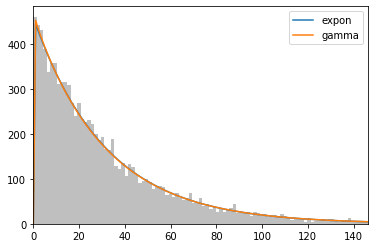


Distribution parameters:
------------------------

Distribution: expon
Parameters: (0.0015038808353713118, 31.63690877623126)

Distribution: gamma
Parameters: (0.9906099100049812, 0.0015038808353713116, 31.952262785662313)


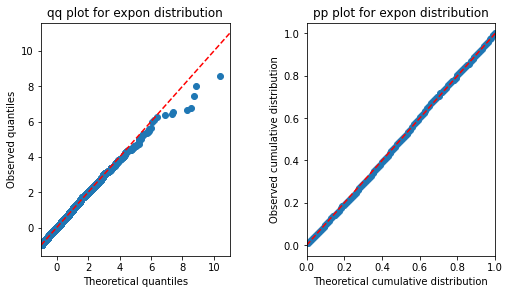

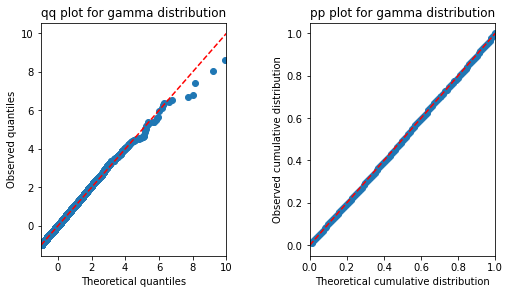

In [28]:
dists_to_test = ['expon', 'gamma']

auto_fit(samples, hist=True, pp=True, dist_names=dists_to_test)